In [1]:
pip install pandas pyarrow


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Membaca dataset USB Test dari file parquet
df_USB_Test = pd.read_parquet("C:\\Data Raihan\\Penelitian Threshold\Dataset\\USB-IDS-1\\USB-IDS-1-TEST.parquet")

# Menampilkan informasi lengkap dari DataFrame
df_USB_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722010 entries, 0 to 722009
Data columns (total 78 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   Protocol                    722010 non-null  int8    
 1   Flow Duration               722010 non-null  int32   
 2   Total Fwd Packet            722010 non-null  int16   
 3   Total Bwd packets           722010 non-null  int16   
 4   Total Length of Fwd Packet  722010 non-null  float32 
 5   Total Length of Bwd Packet  722010 non-null  float32 
 6   Fwd Packet Length Max       722010 non-null  float32 
 7   Fwd Packet Length Min       722010 non-null  float32 
 8   Fwd Packet Length Mean      722010 non-null  float32 
 9   Fwd Packet Length Std       722010 non-null  float32 
 10  Bwd Packet Length Max       722010 non-null  float32 
 11  Bwd Packet Length Min       722010 non-null  float32 
 12  Bwd Packet Length Mean      722010 non-null  float32 
 13 

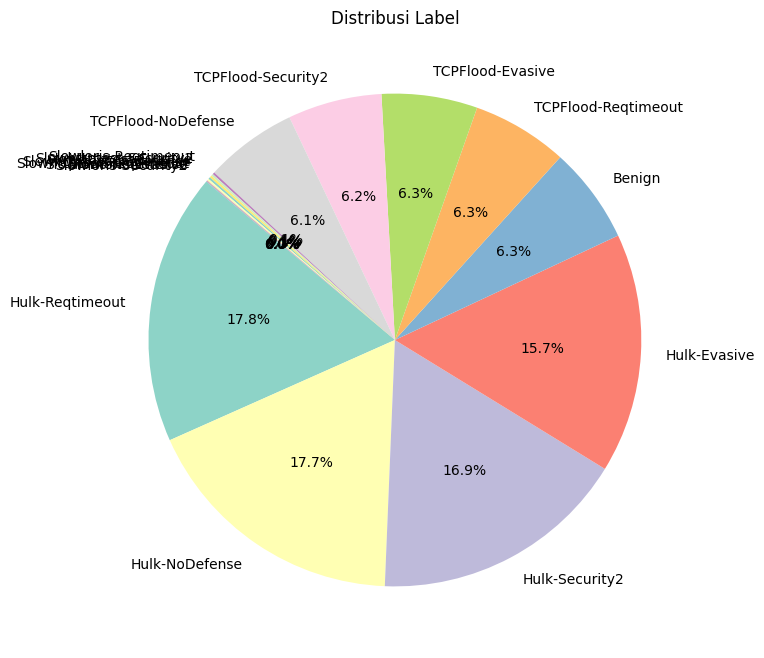

Deskripsi Distribusi Label:
Hulk-Reqtimeout            128346
Hulk-NoDefense             127671
Hulk-Security2             121956
Hulk-Evasive               113552
Benign                      45708
TCPFlood-Reqtimeout         45405
TCPFlood-Evasive            45390
TCPFlood-Security2          44547
TCPFlood-NoDefense          43762
Slowloris-Reqtimeout         1017
Slowhttptest-Security2       1003
Slowhttptest-Evasive         1002
Slowhttptest-NoDefense        998
Slowhttptest-Reqtimeout       852
Slowloris-Evasive             267
Slowloris-NoDefense           267
Slowloris-Security2           267
Name: Label, dtype: int64


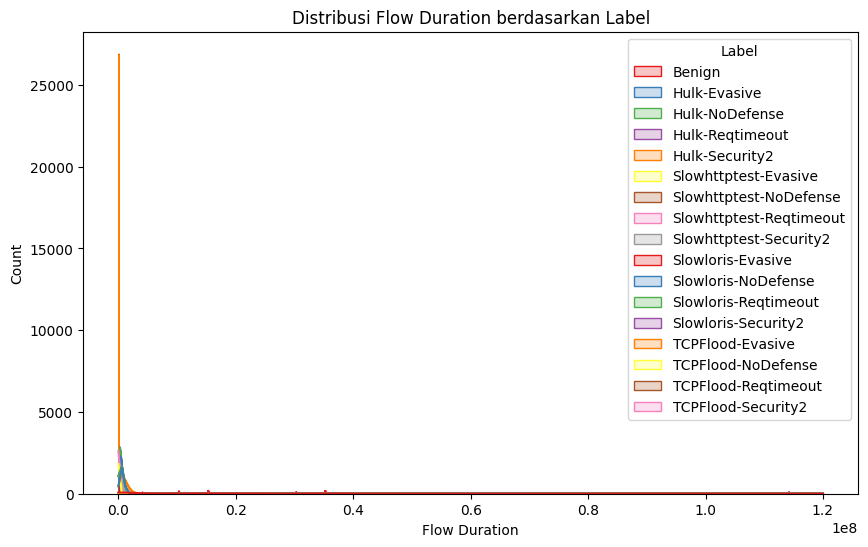


Deskripsi Flow Duration:
                            count          mean           std         min  \
Label                                                                       
Benign                    45708.0  1.173525e+07  1.973743e+07       381.0   
Hulk-Evasive             113552.0  5.783548e+05  4.193275e+05       686.0   
Hulk-NoDefense           127671.0  6.614794e+05  1.240553e+06       623.0   
Hulk-Reqtimeout          128346.0  6.444593e+05  1.165849e+06       169.0   
Hulk-Security2           121956.0  1.178840e+06  1.657527e+06      3561.0   
Slowhttptest-Evasive       1002.0  7.411811e+07  2.728323e+07     40737.0   
Slowhttptest-NoDefense      998.0  7.372307e+07  2.541813e+07   1001241.0   
Slowhttptest-Reqtimeout     852.0  5.801122e+07  3.056699e+07        42.0   
Slowhttptest-Security2     1003.0  7.493538e+07  2.515367e+07    101312.0   
Slowloris-Evasive           267.0  1.012162e+08  2.265932e+07  15251457.0   
Slowloris-NoDefense         267.0  1.018193e+08  2

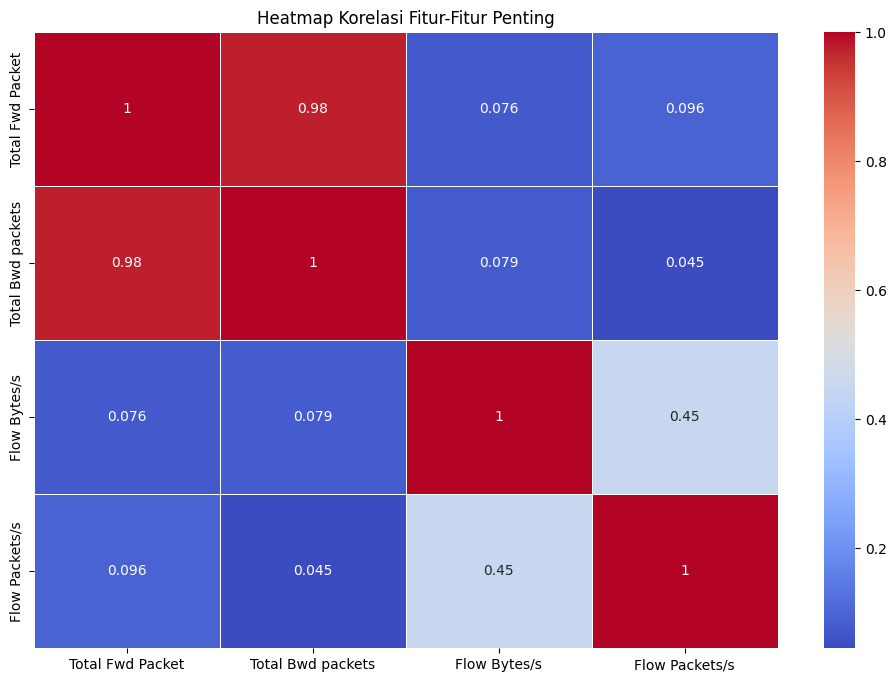


Deskripsi Korelasi Fitur:
                   Total Fwd Packet  Total Bwd packets  Flow Bytes/s  \
Total Fwd Packet           1.000000           0.975838      0.076442   
Total Bwd packets          0.975838           1.000000      0.079020   
Flow Bytes/s               0.076442           0.079020      1.000000   
Flow Packets/s             0.096005           0.045065      0.448881   

                   Flow Packets/s  
Total Fwd Packet         0.096005  
Total Bwd packets        0.045065  
Flow Bytes/s             0.448881  
Flow Packets/s           1.000000  


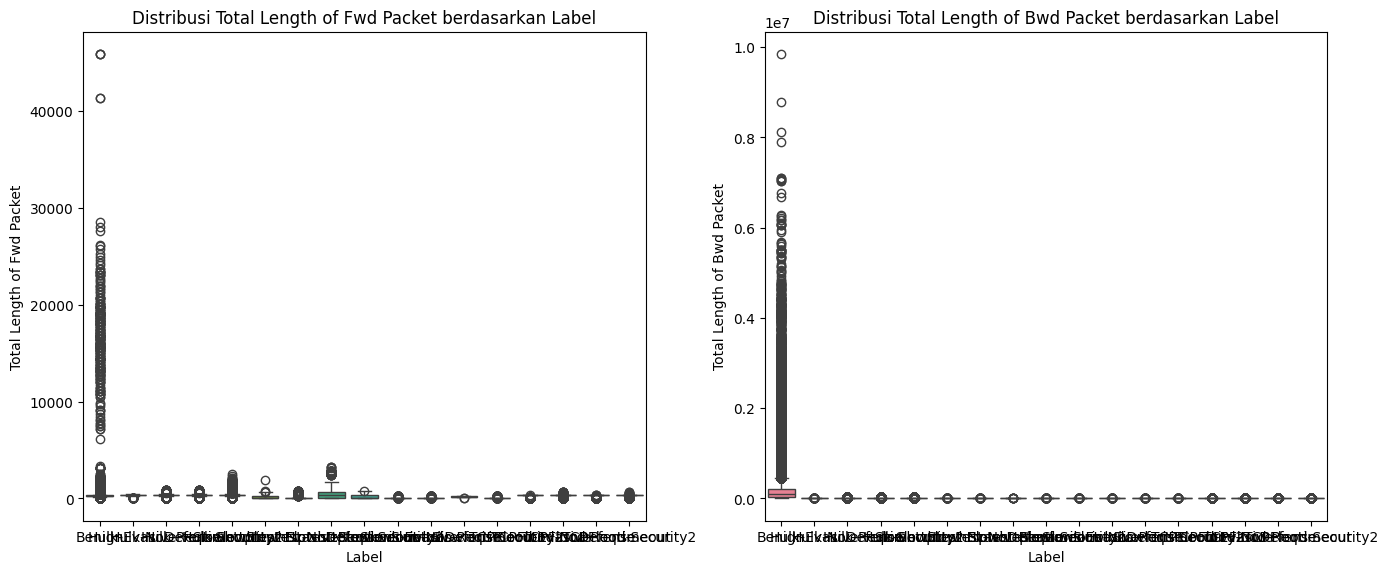


Deskripsi Total Length of Fwd Packet dan Total Length of Bwd Packet:
                        Total Length of Fwd Packet                           \
                                             count        mean          std   
Label                                                                         
Benign                                     45708.0  425.575684  1381.796753   
Hulk-Evasive                              113552.0  360.448364    29.810734   
Hulk-NoDefense                            127671.0  363.183533    45.033844   
Hulk-Reqtimeout                           128346.0  362.931091    44.099018   
Hulk-Security2                            121956.0  379.199585   104.893898   
Slowhttptest-Evasive                        1002.0  125.057884   222.518036   
Slowhttptest-NoDefense                       998.0  123.048096   224.312012   
Slowhttptest-Reqtimeout                      852.0  696.268799   987.943604   
Slowhttptest-Security2                      1003.0  128.58424

In [5]:
# 1. Visualisasi Distribusi Label
plt.figure(figsize=(10, 8))

# Mengambil jumlah label unik
num_labels = df_USB_Test["Label"].nunique()

# Membuat pie chart dengan palet warna yang sesuai dengan jumlah label
df_USB_Test["Label"].value_counts().plot(
    kind="pie", 
    autopct="%1.1f%%", 
    colors=sns.color_palette("Set3", num_labels),
    startangle=140
)

plt.title("Distribusi Label")
plt.ylabel("")  # Menghilangkan label y agar lebih bersih
plt.show()

# Deskripsi Singkat Tentang Distribusi Label
print("Deskripsi Distribusi Label:")
label_counts = df_USB_Test["Label"].value_counts()
print(label_counts)

# 2. Visualisasi Distribusi Flow Duration
plt.figure(figsize=(10, 6))
sns.histplot(df_USB_Test, x="Flow Duration", hue="Label", element="step", palette="Set1", kde=True)
plt.title("Distribusi Flow Duration berdasarkan Label")
plt.xlabel("Flow Duration")
plt.ylabel("Count")
plt.show()

# Deskripsi Singkat Tentang Flow Duration
print("\nDeskripsi Flow Duration:")
print(df_USB_Test.groupby("Label")["Flow Duration"].describe())

# 3. Heatmap Korelasi Fitur-Fitur Penting
features_of_interest = ["Total Fwd Packet", "Total Bwd packets", "Flow Bytes/s", "Flow Packets/s"]

plt.figure(figsize=(12, 8))
sns.heatmap(df_USB_Test[features_of_interest].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur-Fitur Penting")
plt.show()

# Deskripsi Singkat Tentang Korelasi Fitur-Fitur Penting
print("\nDeskripsi Korelasi Fitur:")
print(df_USB_Test[features_of_interest].corr())

# 4. Visualisasi Boxplot untuk Distribusi Total Length of Fwd Packet dan Total Length of Bwd Packet
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x="Label", y="Total Length of Fwd Packet", data=df_USB_Test, hue="Label")
plt.title("Distribusi Total Length of Fwd Packet berdasarkan Label")

plt.subplot(1, 2, 2)
sns.boxplot(x="Label", y="Total Length of Bwd Packet", data=df_USB_Test, hue="Label")
plt.title("Distribusi Total Length of Bwd Packet berdasarkan Label")

plt.tight_layout()
plt.show()

# Deskripsi Singkat Tentang Distribusi Total Length of Fwd Packet dan Total Length of Bwd Packet
print("\nDeskripsi Total Length of Fwd Packet dan Total Length of Bwd Packet:")
print(df_USB_Test.groupby("Label")[["Total Length of Fwd Packet", "Total Length of Bwd Packet"]].describe())


In [6]:
# Membaca dataset USB Train dari file parquet
df_USB_Train = pd.read_parquet("C:\\Data Raihan\\Penelitian Threshold\\Dataset\\USB-IDS-1\\USB-IDS-1-TRAIN.parquet")

# Menampilkan informasi lengkap dari DataFrame
df_USB_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3369070 entries, 0 to 3369069
Data columns (total 78 columns):
 #   Column                      Dtype   
---  ------                      -----   
 0   Protocol                    int8    
 1   Flow Duration               int32   
 2   Total Fwd Packet            int16   
 3   Total Bwd packets           int16   
 4   Total Length of Fwd Packet  float32 
 5   Total Length of Bwd Packet  float32 
 6   Fwd Packet Length Max       float32 
 7   Fwd Packet Length Min       float32 
 8   Fwd Packet Length Mean      float32 
 9   Fwd Packet Length Std       float32 
 10  Bwd Packet Length Max       float32 
 11  Bwd Packet Length Min       float32 
 12  Bwd Packet Length Mean      float32 
 13  Bwd Packet Length Std       float32 
 14  Flow Bytes/s                float32 
 15  Flow Packets/s              float32 
 16  Flow IAT Mean               float32 
 17  Flow IAT Std                float32 
 18  Flow IAT Max                float32 
 19  

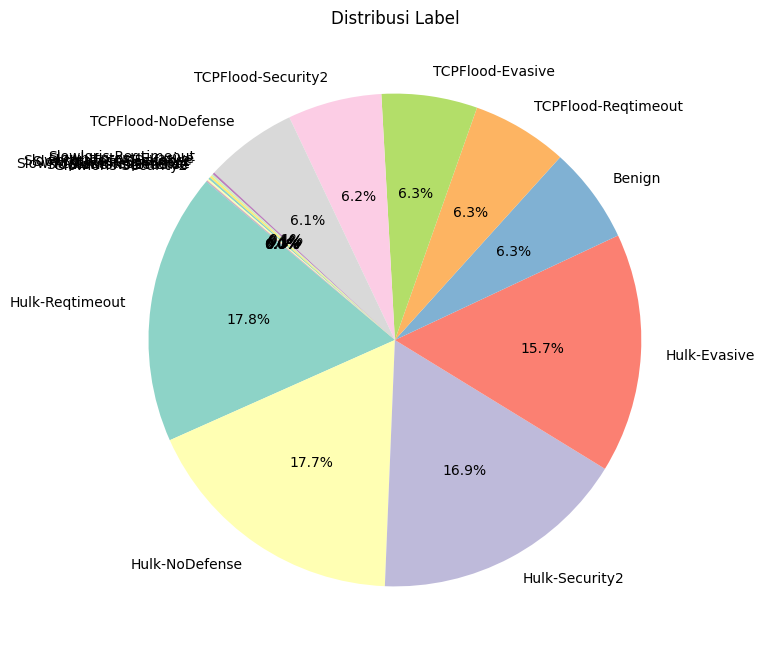

Deskripsi Distribusi Label:
Hulk-Reqtimeout            598939
Hulk-NoDefense             595790
Hulk-Security2             569131
Hulk-Evasive               529884
Benign                     213305
TCPFlood-Reqtimeout        211883
TCPFlood-Evasive           211801
TCPFlood-Security2         207862
TCPFlood-NoDefense         204200
Slowloris-Reqtimeout         4747
Slowhttptest-Evasive         4666
Slowhttptest-NoDefense       4661
Slowhttptest-Security2       4661
Slowhttptest-Reqtimeout      3798
Slowloris-NoDefense          1248
Slowloris-Evasive            1247
Slowloris-Security2          1247
Name: Label, dtype: int64


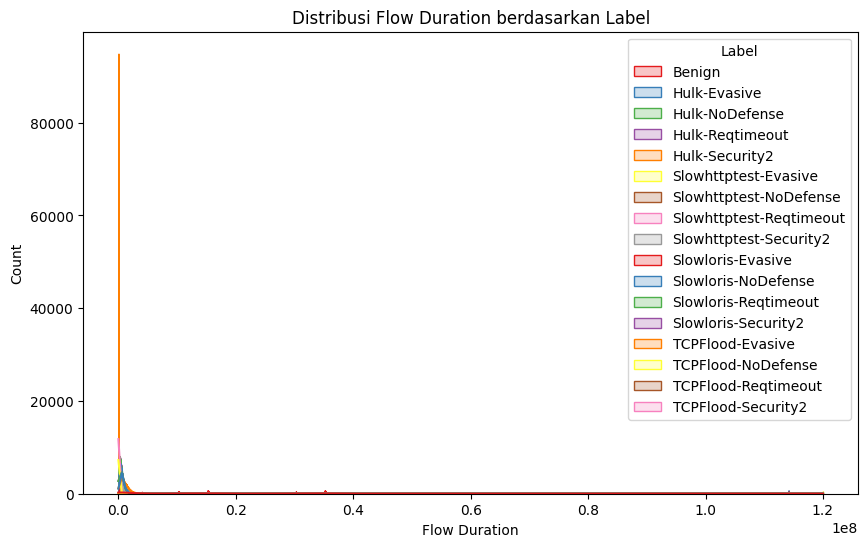


Deskripsi Flow Duration:
                            count          mean           std         min  \
Label                                                                       
Benign                   213305.0  1.172172e+07  1.980921e+07       287.0   
Hulk-Evasive             529884.0  5.760333e+05  4.179401e+05       637.0   
Hulk-NoDefense           595790.0  6.517799e+05  1.206841e+06       565.0   
Hulk-Reqtimeout          598939.0  6.450923e+05  1.176834e+06        91.0   
Hulk-Security2           569131.0  1.172483e+06  1.642013e+06      3362.0   
Slowhttptest-Evasive       4666.0  7.486846e+07  2.671622e+07       326.0   
Slowhttptest-NoDefense     4661.0  7.426662e+07  2.584969e+07       297.0   
Slowhttptest-Reqtimeout    3798.0  5.865115e+07  2.902877e+07        42.0   
Slowhttptest-Security2     4661.0  7.413397e+07  2.675520e+07         9.0   
Slowloris-Evasive          1247.0  1.026262e+08  2.208742e+07   7209124.0   
Slowloris-NoDefense        1248.0  1.024675e+08  2

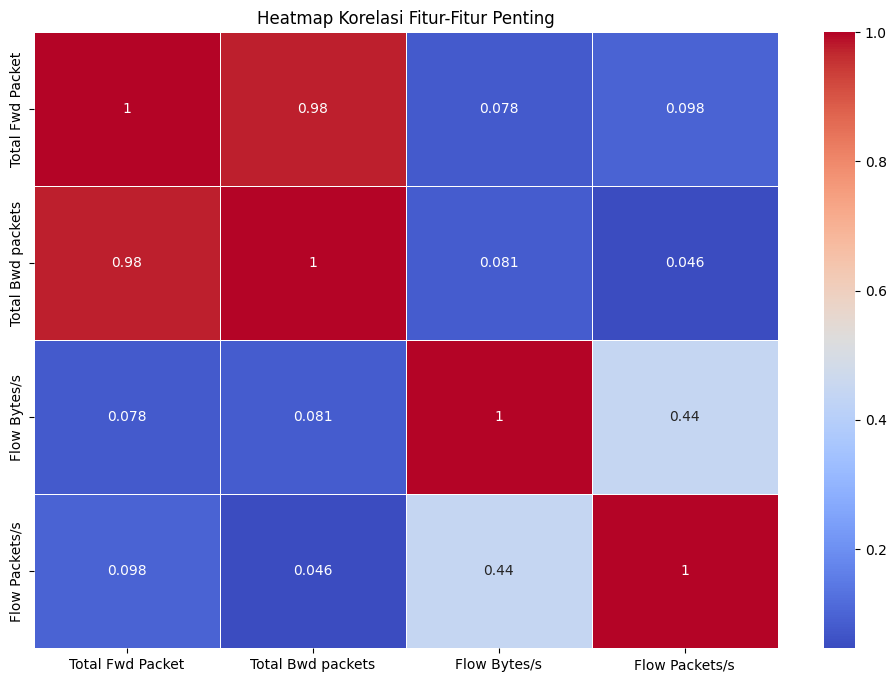


Deskripsi Korelasi Fitur:
                   Total Fwd Packet  Total Bwd packets  Flow Bytes/s  \
Total Fwd Packet           1.000000           0.976120      0.077789   
Total Bwd packets          0.976120           1.000000      0.080533   
Flow Bytes/s               0.077789           0.080533      1.000000   
Flow Packets/s             0.097661           0.046260      0.442412   

                   Flow Packets/s  
Total Fwd Packet         0.097661  
Total Bwd packets        0.046260  
Flow Bytes/s             0.442412  
Flow Packets/s           1.000000  


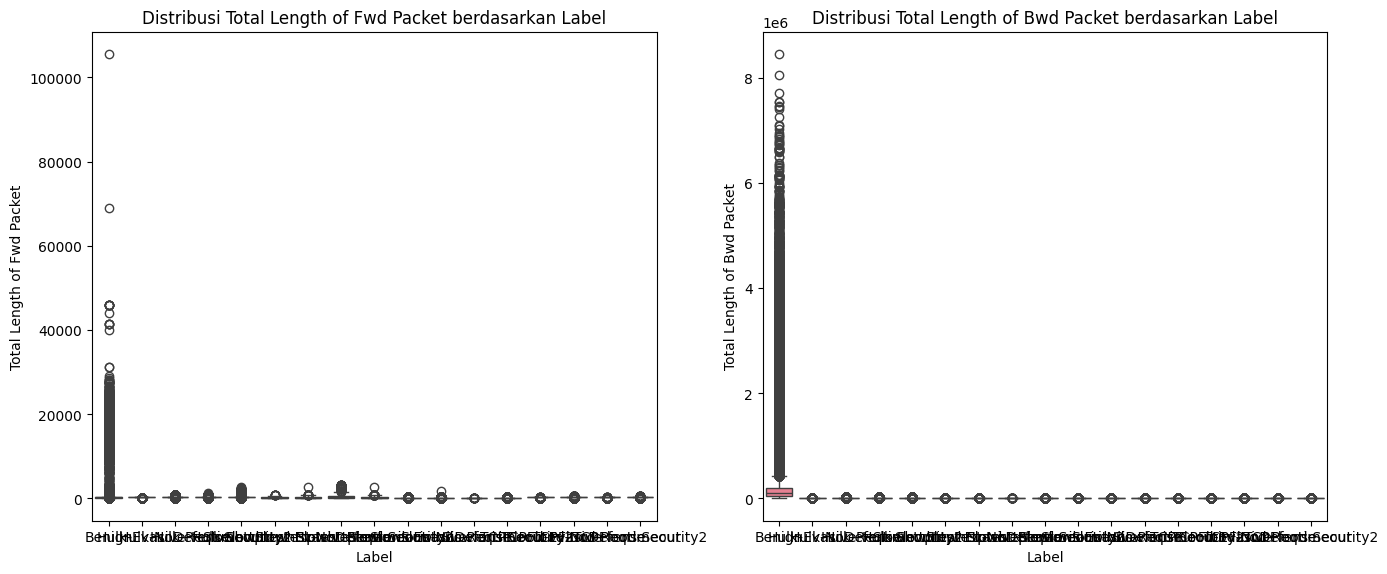


Deskripsi Total Length of Fwd Packet dan Total Length of Bwd Packet:
                        Total Length of Fwd Packet                           \
                                             count        mean          std   
Label                                                                         
Benign                                    213305.0  440.206512  1462.150757   
Hulk-Evasive                              529884.0  360.634644    29.704355   
Hulk-NoDefense                            595790.0  362.967285    44.343189   
Hulk-Reqtimeout                           598939.0  362.862885    43.720406   
Hulk-Security2                            569131.0  379.256714   105.297516   
Slowhttptest-Evasive                        4666.0  122.768326   213.147980   
Slowhttptest-NoDefense                      4661.0  127.462563   225.924530   
Slowhttptest-Reqtimeout                     3798.0  663.696411   960.175354   
Slowhttptest-Security2                      4661.0  125.49603

In [7]:
# 1. Visualisasi Distribusi Label
plt.figure(figsize=(10, 8))

# Mengambil jumlah label unik
num_labels = df_USB_Train["Label"].nunique()

# Membuat pie chart dengan palet warna yang sesuai dengan jumlah label
df_USB_Train["Label"].value_counts().plot(
    kind="pie", 
    autopct="%1.1f%%", 
    colors=sns.color_palette("Set3", num_labels),
    startangle=140
)

plt.title("Distribusi Label")
plt.ylabel("")  # Menghilangkan label y agar lebih bersih
plt.show()

# Deskripsi Singkat Tentang Distribusi Label
print("Deskripsi Distribusi Label:")
label_counts = df_USB_Train["Label"].value_counts()
print(label_counts)

# 2. Visualisasi Distribusi Flow Duration
plt.figure(figsize=(10, 6))
sns.histplot(df_USB_Train, x="Flow Duration", hue="Label", element="step", palette="Set1", kde=True)
plt.title("Distribusi Flow Duration berdasarkan Label")
plt.xlabel("Flow Duration")
plt.ylabel("Count")
plt.show()

# Deskripsi Singkat Tentang Flow Duration
print("\nDeskripsi Flow Duration:")
print(df_USB_Train.groupby("Label")["Flow Duration"].describe())

# 3. Heatmap Korelasi Fitur-Fitur Penting
features_of_interest = ["Total Fwd Packet", "Total Bwd packets", "Flow Bytes/s", "Flow Packets/s"]

plt.figure(figsize=(12, 8))
sns.heatmap(df_USB_Train[features_of_interest].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur-Fitur Penting")
plt.show()

# Deskripsi Singkat Tentang Korelasi Fitur-Fitur Penting
print("\nDeskripsi Korelasi Fitur:")
print(df_USB_Train[features_of_interest].corr())

# 4. Visualisasi Boxplot untuk Distribusi Total Length of Fwd Packet dan Total Length of Bwd Packet
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x="Label", y="Total Length of Fwd Packet", data=df_USB_Train, hue="Label")
plt.title("Distribusi Total Length of Fwd Packet berdasarkan Label")

plt.subplot(1, 2, 2)
sns.boxplot(x="Label", y="Total Length of Bwd Packet", data=df_USB_Train, hue="Label")
plt.title("Distribusi Total Length of Bwd Packet berdasarkan Label")

plt.tight_layout()
plt.show()

# Deskripsi Singkat Tentang Distribusi Total Length of Fwd Packet dan Total Length of Bwd Packet
print("\nDeskripsi Total Length of Fwd Packet dan Total Length of Bwd Packet:")
print(df_USB_Train.groupby("Label")[["Total Length of Fwd Packet", "Total Length of Bwd Packet"]].describe())


In [8]:
# Membaca dataset USB Validation dari file parquet
df_USB_Validation = pd.read_parquet("C:\\Data Raihan\\Penelitian Threshold\\Dataset\\USB-IDS-1\\USB-IDS-1-VALIDATION.parquet")

# Menampilkan informasi lengkap dari DataFrame
df_USB_Validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721986 entries, 0 to 721985
Data columns (total 78 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   Protocol                    721986 non-null  int8    
 1   Flow Duration               721986 non-null  int32   
 2   Total Fwd Packet            721986 non-null  int16   
 3   Total Bwd packets           721986 non-null  int16   
 4   Total Length of Fwd Packet  721986 non-null  float32 
 5   Total Length of Bwd Packet  721986 non-null  float32 
 6   Fwd Packet Length Max       721986 non-null  float32 
 7   Fwd Packet Length Min       721986 non-null  float32 
 8   Fwd Packet Length Mean      721986 non-null  float32 
 9   Fwd Packet Length Std       721986 non-null  float32 
 10  Bwd Packet Length Max       721986 non-null  float32 
 11  Bwd Packet Length Min       721986 non-null  float32 
 12  Bwd Packet Length Mean      721986 non-null  float32 
 13 

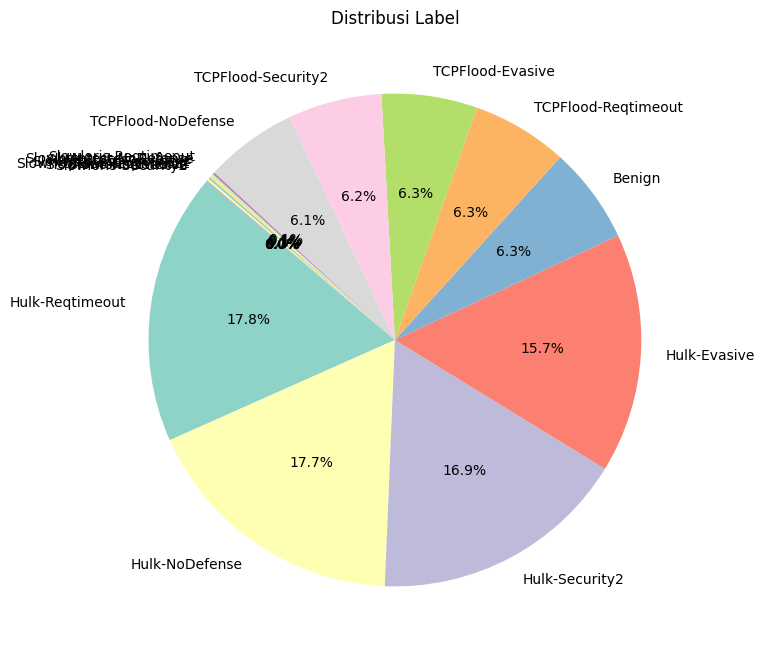

Deskripsi Distribusi Label:
Hulk-Reqtimeout            128345
Hulk-NoDefense             127669
Hulk-Security2             121959
Hulk-Evasive               113549
Benign                      45720
TCPFlood-Reqtimeout         45397
TCPFlood-Evasive            45380
TCPFlood-Security2          44534
TCPFlood-NoDefense          43758
Slowloris-Reqtimeout         1017
Slowhttptest-NoDefense       1003
Slowhttptest-Evasive         1002
Slowhttptest-Security2       1002
Slowhttptest-Reqtimeout       850
Slowloris-Evasive             267
Slowloris-NoDefense           267
Slowloris-Security2           267
Name: Label, dtype: int64


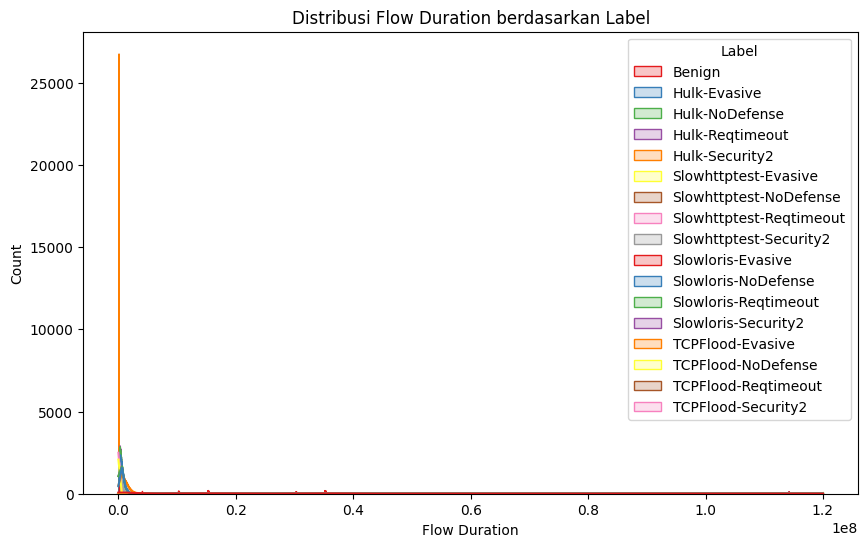


Deskripsi Flow Duration:
                            count          mean           std         min  \
Label                                                                       
Benign                    45720.0  1.174358e+07  2.000146e+07       307.0   
Hulk-Evasive             113549.0  5.767847e+05  4.189138e+05       611.0   
Hulk-NoDefense           127669.0  6.524407e+05  1.204366e+06       607.0   
Hulk-Reqtimeout          128345.0  6.403749e+05  1.156313e+06       113.0   
Hulk-Security2           121959.0  1.180768e+06  1.651827e+06      3480.0   
Slowhttptest-Evasive       1002.0  7.533080e+07  2.753839e+07   1001935.0   
Slowhttptest-NoDefense     1003.0  7.467199e+07  2.705619e+07     40748.0   
Slowhttptest-Reqtimeout     850.0  5.729121e+07  3.015258e+07        43.0   
Slowhttptest-Security2     1002.0  7.604891e+07  2.731057e+07   1001942.0   
Slowloris-Evasive           267.0  1.003021e+08  2.394735e+07  15240940.0   
Slowloris-NoDefense         267.0  1.004108e+08  2

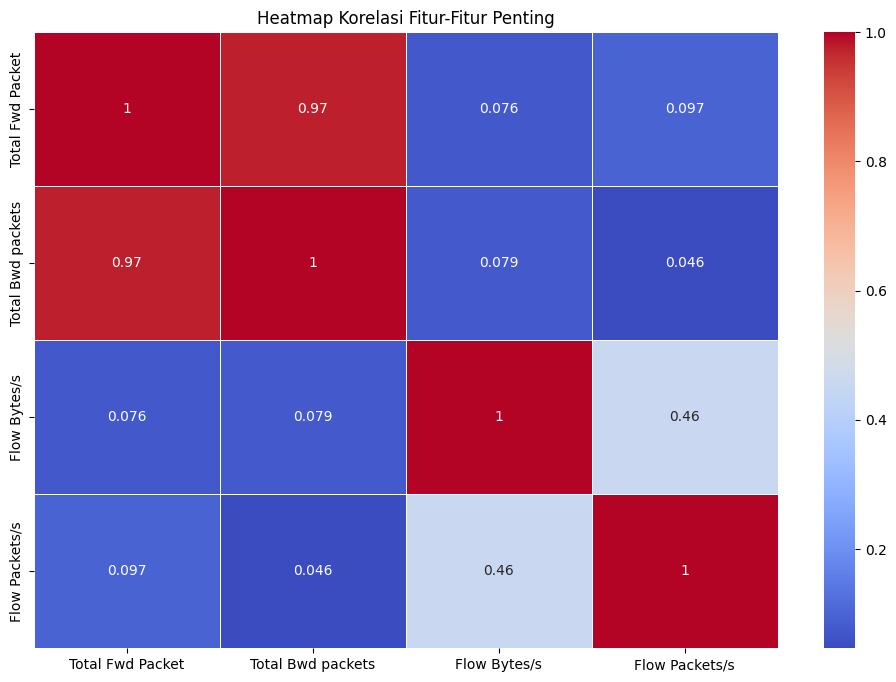


Deskripsi Korelasi Fitur:
                   Total Fwd Packet  Total Bwd packets  Flow Bytes/s  \
Total Fwd Packet           1.000000           0.974858      0.075860   
Total Bwd packets          0.974858           1.000000      0.078630   
Flow Bytes/s               0.075860           0.078630      1.000000   
Flow Packets/s             0.097320           0.046351      0.455439   

                   Flow Packets/s  
Total Fwd Packet         0.097320  
Total Bwd packets        0.046351  
Flow Bytes/s             0.455439  
Flow Packets/s           1.000000  


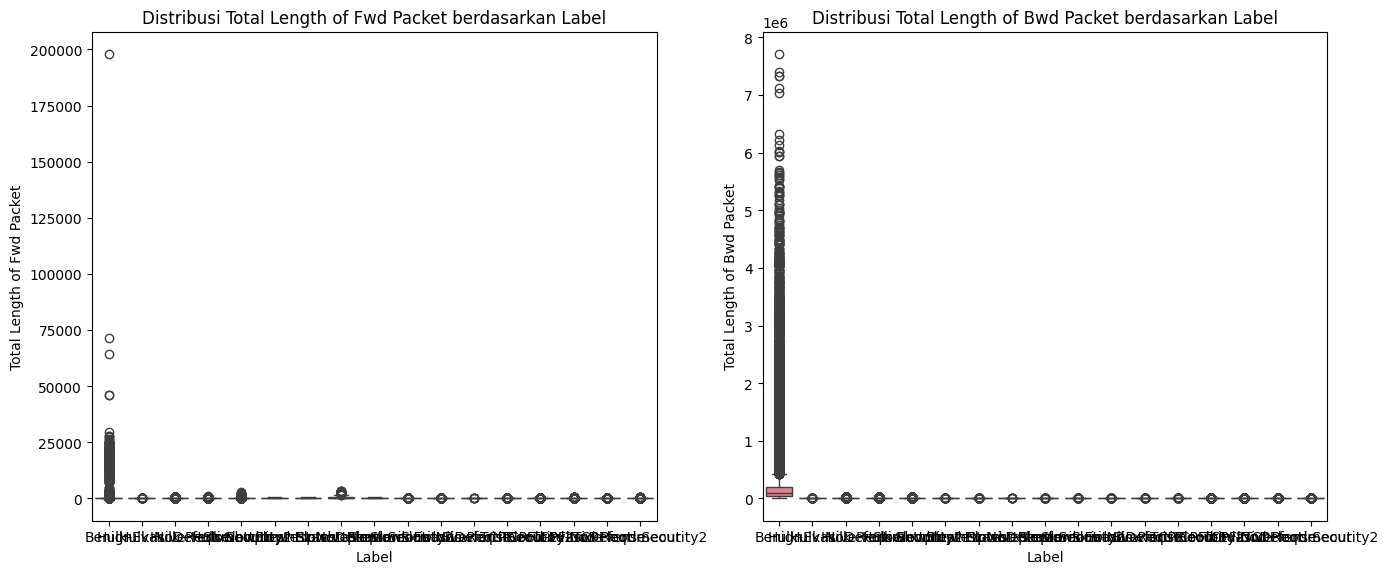


Deskripsi Total Length of Fwd Packet dan Total Length of Bwd Packet:
                        Total Length of Fwd Packet                           \
                                             count        mean          std   
Label                                                                         
Benign                                     45720.0  450.414032  1798.379395   
Hulk-Evasive                              113549.0  360.763977    29.796230   
Hulk-NoDefense                            127669.0  362.891632    44.065590   
Hulk-Reqtimeout                           128345.0  362.691010    43.292553   
Hulk-Security2                            121959.0  379.489685   105.945450   
Slowhttptest-Evasive                        1002.0  127.362274   218.876251   
Slowhttptest-NoDefense                      1003.0  135.269196   228.352127   
Slowhttptest-Reqtimeout                      850.0  691.272949   970.433289   
Slowhttptest-Security2                      1002.0  139.11477

In [9]:
# 1. Visualisasi Distribusi Label
plt.figure(figsize=(10, 8))

# Mengambil jumlah label unik
num_labels = df_USB_Validation["Label"].nunique()

# Membuat pie chart dengan palet warna yang sesuai dengan jumlah label
df_USB_Validation["Label"].value_counts().plot(
    kind="pie", 
    autopct="%1.1f%%", 
    colors=sns.color_palette("Set3", num_labels),
    startangle=140
)

plt.title("Distribusi Label")
plt.ylabel("")  # Menghilangkan label y agar lebih bersih
plt.show()

# Deskripsi Singkat Tentang Distribusi Label
print("Deskripsi Distribusi Label:")
label_counts = df_USB_Validation["Label"].value_counts()
print(label_counts)

# 2. Visualisasi Distribusi Flow Duration
plt.figure(figsize=(10, 6))
sns.histplot(df_USB_Validation, x="Flow Duration", hue="Label", element="step", palette="Set1", kde=True)
plt.title("Distribusi Flow Duration berdasarkan Label")
plt.xlabel("Flow Duration")
plt.ylabel("Count")
plt.show()

# Deskripsi Singkat Tentang Flow Duration
print("\nDeskripsi Flow Duration:")
print(df_USB_Validation.groupby("Label")["Flow Duration"].describe())

# 3. Heatmap Korelasi Fitur-Fitur Penting
features_of_interest = ["Total Fwd Packet", "Total Bwd packets", "Flow Bytes/s", "Flow Packets/s"]

plt.figure(figsize=(12, 8))
sns.heatmap(df_USB_Validation[features_of_interest].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur-Fitur Penting")
plt.show()

# Deskripsi Singkat Tentang Korelasi Fitur-Fitur Penting
print("\nDeskripsi Korelasi Fitur:")
print(df_USB_Validation[features_of_interest].corr())

# 4. Visualisasi Boxplot untuk Distribusi Total Length of Fwd Packet dan Total Length of Bwd Packet
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x="Label", y="Total Length of Fwd Packet", data=df_USB_Validation, hue="Label")
plt.title("Distribusi Total Length of Fwd Packet berdasarkan Label")

plt.subplot(1, 2, 2)
sns.boxplot(x="Label", y="Total Length of Bwd Packet", data=df_USB_Validation, hue="Label")
plt.title("Distribusi Total Length of Bwd Packet berdasarkan Label")

plt.tight_layout()
plt.show()

# Deskripsi Singkat Tentang Distribusi Total Length of Fwd Packet dan Total Length of Bwd Packet
print("\nDeskripsi Total Length of Fwd Packet dan Total Length of Bwd Packet:")
print(df_USB_Validation.groupby("Label")[["Total Length of Fwd Packet", "Total Length of Bwd Packet"]].describe())
